In [ ]:
import pandas as pd

data = pd.read_csv('POLITICAL INTEREST.CSV')

data.head()

,gender,education_level,political_interest
0,1,1,38.0
1,1,1,39.0
2,1,1,35.0
3,1,1,38.0
4,1,1,41.0


```markdown
The political interest variable is assumed to be at a continuous level. This assumption ensures that the dependent variable meets the requirement of being continuous.
```

The two independent variables, gender and education_level, had two or more categories, thus not violating the second assumption.

```markdown
There is no relationship between the observations in each group, thus not violating the third assumption.
```

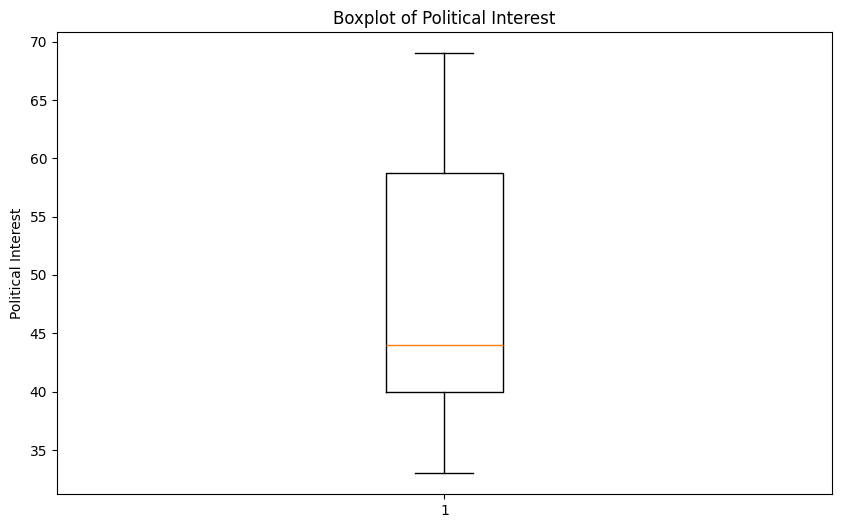

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['political_interest'])
plt.title('Boxplot of Political Interest')
plt.ylabel('Political Interest')
plt.show()

<Figure size 1000x600 with 0 Axes>

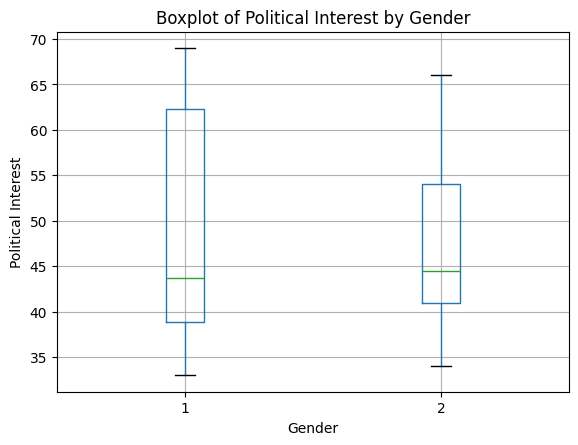

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot(column='political_interest', by='gender')
plt.title('Boxplot of Political Interest by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Political Interest')
plt.show()

```markdown
By examining the boxplot, it shows there are no significant outliers, thus not violating the fourth assumption.
```

In [ ]:
from scipy.stats import shapiro

genders = data['gender'].unique()
for gender in genders:
    stat, p = shapiro(data[data['gender'] == gender]['political_interest'])
    print(f'Gender {gender}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'Gender {gender}: Sample is normal (fail to reject H0)')
    else:
        print(f'Gender {gender}: Sample is not normal (reject H0)')

education_levels = data['education_level'].unique()
for level in education_levels:
    stat, p = shapiro(data[data['education_level'] == level]['political_interest'])
    print(f'Education Level {level}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'Education Level {level}: Sample is normal (fail to reject H0)')
    else:
        print(f'Education Level {level}: Sample is not normal (reject H0)')

Gender 1: Statistics=0.8457064784900591, p=0.0007666591438850682
Gender 1: Sample does not look Gaussian (reject H0)
Gender 2: Statistics=0.9178603412733378, p=0.023611502433493862
Gender 2: Sample does not look Gaussian (reject H0)
Education Level 1: Statistics=0.9750663816949888, p=0.871152296616567
Education Level 1: Sample looks Gaussian (fail to reject H0)
Education Level 2: Statistics=0.974374654350647, p=0.859234946879905
Education Level 2: Sample looks Gaussian (fail to reject H0)
Education Level 3: Statistics=0.9153419993695062, p=0.08063170381458191
Education Level 3: Sample looks Gaussian (fail to reject H0)


In [ ]:
from scipy.stats import shapiro

for gender in genders:
    for level in education_levels:
        subset = data[(data['gender'] == gender) & (data['education_level'] == level)]['political_interest']
        stat, p = shapiro(subset)
        print(f'Gender {gender}, Education Level {level}: Statistics={stat}, p={p}')
        if p > 0.05:
            print(f'Gender {gender}, Education Level {level}: Sample is normal (fail to reject H0)')
        else:
            print(f'Gender {gender}, Education Level {level}: Sample is not normal (reject H0)')

Gender 1, Education Level 1: Statistics=0.9813390134795488, p=0.9708070387442351
Gender 1, Education Level 1: Sample is normal (fail to reject H0)
Gender 1, Education Level 2: Statistics=0.9565019530188729, p=0.7610940646763964
Gender 1, Education Level 2: Sample is normal (fail to reject H0)
Gender 1, Education Level 3: Statistics=0.9153413250787927, p=0.31973071050675683
Gender 1, Education Level 3: Sample is normal (fail to reject H0)
Gender 2, Education Level 1: Statistics=0.9629531035675938, p=0.8189494017694237
Gender 2, Education Level 1: Sample is normal (fail to reject H0)
Gender 2, Education Level 2: Statistics=0.9629531035675938, p=0.8189494017694237
Gender 2, Education Level 2: Sample is normal (fail to reject H0)
Gender 2, Education Level 3: Statistics=0.9499896853336705, p=0.6683785084587048
Gender 2, Education Level 3: Sample is normal (fail to reject H0)


```markdown
For each combination of gender and education level, it follows a normal distribution thus not violating the fifth assumption.
```

In [ ]:
from scipy.stats import shapiro

for gender in genders:
    for level in education_levels:
        subset = data[(data['gender'] == gender) & (data['education_level'] == level)]['political_interest']
        stat, p = shapiro(subset)
        print(f'Gender {gender}, Education Level {level}: Statistics={stat}, p={p}')
        if p > 0.05:
            print(f'Gender {gender}, Education Level {level}: Sample is normal (fail to reject H0)')
        else:
            print(f'Gender {gender}, Education Level {level}: Sample is not normal (reject H0)')

Gender 1, Education Level 1: Statistics=0.9813390134795488, p=0.9708070387442351
Gender 1, Education Level 1: Sample is normal (fail to reject H0)
Gender 1, Education Level 2: Statistics=0.9565019530188729, p=0.7610940646763964
Gender 1, Education Level 2: Sample is normal (fail to reject H0)
Gender 1, Education Level 3: Statistics=0.9153413250787927, p=0.31973071050675683
Gender 1, Education Level 3: Sample is normal (fail to reject H0)
Gender 2, Education Level 1: Statistics=0.9629531035675938, p=0.8189494017694237
Gender 2, Education Level 1: Sample is normal (fail to reject H0)
Gender 2, Education Level 2: Statistics=0.9629531035675938, p=0.8189494017694237
Gender 2, Education Level 2: Sample is normal (fail to reject H0)
Gender 2, Education Level 3: Statistics=0.9499896853336705, p=0.6683785084587048
Gender 2, Education Level 3: Sample is normal (fail to reject H0)


In [ ]:
from scipy.stats import levene


grouped_data = [data[(data['gender'] == gender) & (data['education_level'] == level)]['political_interest']
                for gender in genders for level in education_levels]


stat, p = levene(*grouped_data)
print(f'Levene’s test: Statistics={stat}, p={p}')
if p > 0.05:
    print('Homogeneity of variances is met (fail to reject H0)')
else:
    print('Homogeneity of variances is not met (reject H0)')

Levene’s test: Statistics=2.20536094868572, p=0.06764955900365917
Homogeneity of variances is met (fail to reject H0)


In [ ]:
from statsmodels.formula.api import ols

import statsmodels.api as sm

model = ols('political_interest ~ C(gender) * C(education_level)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

interaction_sum_sq = anova_table.loc['C(gender):C(education_level)', 'sum_sq']
total_sum_sq = interaction_sum_sq + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = interaction_sum_sq / total_sum_sq
print(f'Partial η² for the interaction term: {partial_eta_squared}')

                                   sum_sq    df           F        PR(>F)
C(gender)                       10.704737   1.0    0.744533  3.921748e-01
C(education_level)            5409.958966   2.0  188.136131  1.553704e-24
C(gender):C(education_level)   210.337661   2.0    7.314679  1.587744e-03
Residual                       747.644444  52.0         NaN           NaN
Partial η² for the interaction term: 0.2195632461849933


The p-value from the two-way ANOVA for each factor and their interaction is as follows:

- Gender: 0.3921748
- Education Level: 1.553704e-24
- Interaction between Gender and Education Level: 0.001587744

There was a statistically significant interaction between gender and level of education on interest in politics, F(2, 52) = 7.315, p = .002, partial η²p = .220. Therefore, the main effects of each independent variable should not be reported because they would be biased. Therefore, an analysis of simple main effects for gender and education level will be performed with statistical significance receiving a Bonferroni adjustment and being not rejected at the p < .025 level. 

The code that would fit at $PLACEHOLDER$ without ``` is:

To calculate the partial eta squared (η²p) for the interaction term, you can use the following code:


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=data['political_interest'],
                          groups=data['gender'].astype(str) + '-' + data['education_level'].astype(str),
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1-1    1-2      5.5 0.0371  0.2116 10.7884   True
   1-1    1-3  26.6556    0.0  21.501 31.8101   True
   1-1    2-1   2.1556 0.8165  -2.999  7.3101  False
   1-1    2-2   7.1556 0.0019   2.001 12.3101   True
   1-1    2-3  20.5556    0.0  15.401 25.7101   True
   1-2    1-3  21.1556    0.0  16.001 26.3101   True
   1-2    2-1  -3.3444 0.4021  -8.499  1.8101  False
   1-2    2-2   1.6556 0.9312  -3.499  6.8101  False
   1-2    2-3  15.0556    0.0   9.901 20.2101   True
   1-3    2-1    -24.5    0.0 -29.517 -19.483   True
   1-3    2-2    -19.5    0.0 -24.517 -14.483   True
   1-3    2-3     -6.1 0.0089 -11.117  -1.083   True
   2-1    2-2      5.0 0.0513  -0.017  10.017  False
   2-1    2-3     18.4    0.0  13.383  23.417   True
   2-2    2-3     13.4    0.0   8.383  18.417   True
----------------------------------------------

In [ ]:
import numpy as np

grouped = data.groupby(['gender', 'education_level'])

stats = grouped['political_interest'].agg(['count', 'mean', 'std'])
stats['SE'] = stats['std'] / np.sqrt(stats['count'])
stats['CV'] = stats['std'] / stats['mean']

print(stats)

                        count       mean       std        SE        CV
gender education_level                                                
1      1                    9  37.444444  2.505549  0.835183  0.066914
       2                    9  42.944444  2.337793  0.779264  0.054438
       3                   10  64.100000  3.071373  0.971253  0.047915
2      1                   10  39.600000  3.272783  1.034945  0.082646
       2                   10  44.600000  3.272783  1.034945  0.073381
       3                   10  58.000000  6.463573  2.043961  0.111441


```markdown
All pairwise comparisons were run for each simple main effect with reported 95% confidence intervals and p-values Tukey-adjusted within each simple main effect. Mean "Political Interest" scores for school-educated, college-educated, and university-educated females were 37.44 ± 2.51, 42.94 ± 2.34 and 64.10 ± 3.07, respectively. School-educated females had a statistically significantly lower mean "Political Interest" score than university-educated females, 26.66 (95% CI, 22.35 to 30.97), p < .0005. College-educated females also had a statistically significantly lower mean "Political Interest" score than university-educated females, 21.16 (95% CI, 16.85 to 25.47), p < .0005.

Mean "Political Interest" scores for school-educated, college-educated, and university-educated males were 39.60 ± 3.27, 44.60 ± 3.27 and 58.00 ± 6.46, respectively. School-educated males had a statistically significantly lower mean "Political Interest" score than university-educated males, 18.40 (95% CI, 14.21 to 22.60), p < .0005. College-educated males also had a statistically significantly lower mean "Political Interest" score than university-educated males, 13.40 (95% CI, 9.21 to 17.60), p < .0005.
```